Mount drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing libraries.

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sb
from matplotlib import pyplot as plt 
from operator import itemgetter
from sklearn.metrics import confusion_matrix

Import dataset.

In [66]:
df = pd.read_csv('/content/drive/MyDrive/WoC\'23/Mid-evaluation/weather.csv')
df = pd.DataFrame(df)
df = df.dropna() # Drop rows with NULL values

Split data into train and test dataset.

In [67]:
X = df[df.columns[:4]]
Y = df['weather']

Defining function to get labels in confusion matrix.

In [82]:
# Get labels in confusion matrix
def plot(y_test, ans):
  labels = y_test.unique()
  table = pd.DataFrame(cm, columns=labels, index=labels)
  sns_table = sb.heatmap(table, annot=True, fmt='d', cmap='winter')
  return sns_table

**Defining the function to return accuracy of the model for neighebors 1 to 30.**

In [81]:
def KN_Neighbors(x_text, x_train, y_test, y_train, weight):
  values = [] # List to store the K value and accuracy tuple

  # Store the accuracy score and corresponding K value in values tuple
  for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i, weights=weight)
    knn.fit(x_train, y_train)
    score = knn.score(x_test, y_test)
    y_pred = knn.predict(x_test)
    values.append([i,score])

  values = np.array(values)

  return values, y_pred

Train the dataset.

In [130]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

**1) For weights = 'distance'**

In [131]:
model1, y_pred1 = KN_Neighbors(x_test, x_train, y_test, y_train, 'distance')

Plotting the graph for neighbors 1 to 30 for weights='distance' . 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, "For weights='distance'")

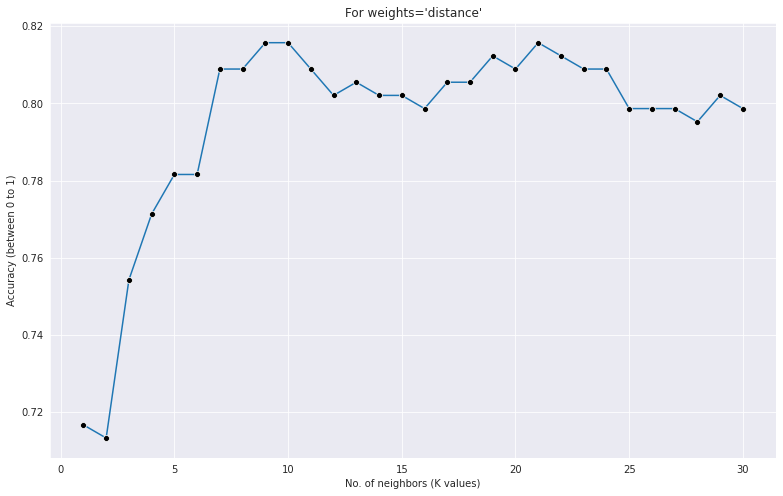

In [132]:
plt.figure(figsize=(13,8))
sb.lineplot(model1[:,0], model1[:, 1], 
            marker='o', markerfacecolor='black')
sb.set_style('darkgrid')
plt.xlabel('No. of neighbors (K values)')
plt.ylabel('Accuracy (between 0 to 1)')
plt.title("For weights='distance'")

Printing maximum accuracy and associated no. of neighbors.

In [133]:
max1 = max(model1, key=itemgetter(1))
print('K value: ' + str(max1[0]))
print('Accuracy score: ' + str(max1[1]*100) + ' %')

K value: 9.0
Accuracy score: 81.56996587030717 %


**Potting confusion matrix.**

[Text(33.0, 0.5, 'True'), Text(0.5, 15.0, 'Predicted')]

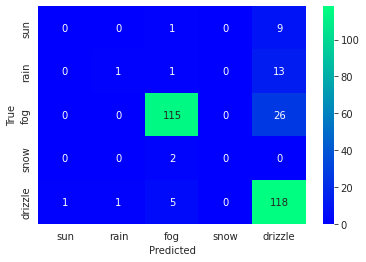

In [134]:
cm = confusion_matrix(y_test, y_pred1)

conf_mat = plot(y_test, y_pred1)
conf_mat.set(xlabel='Predicted', ylabel='True')

**2) For weights='uniform'**

In [135]:
model2, y_pred2 = KN_Neighbors(x_test, x_train, y_test, y_train,'uniform')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, "For weights='uniform'")

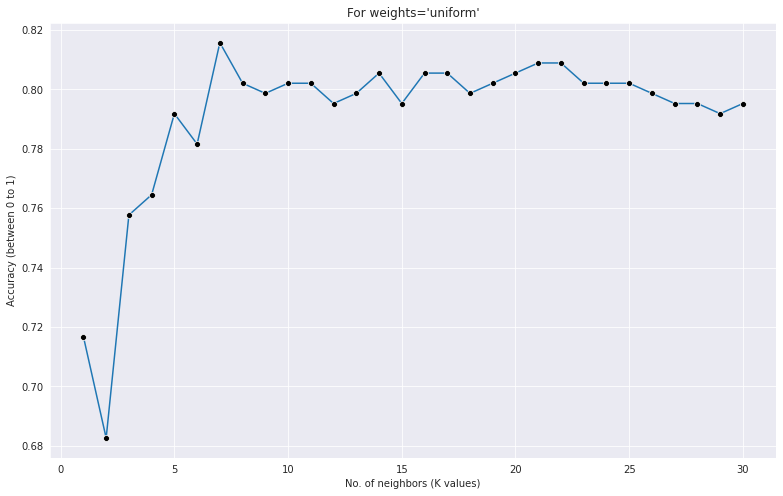

In [136]:
plt.figure(figsize=(13,8))
sb.lineplot(model2[:,0], model2[:, 1], 
            marker='o', markerfacecolor='black')
sb.set_style('darkgrid')
plt.xlabel('No. of neighbors (K values)')
plt.ylabel('Accuracy (between 0 to 1)')
plt.title("For weights='uniform'")

Printing maximum accuracy and associated no. of neighbors.

In [137]:
max2 = max(model2, key=itemgetter(1))
print('K value: ' + str(max2[0]))
print('Accuracy score: ' + str(max2[1]*100) + ' %')

K value: 7.0
Accuracy score: 81.56996587030717 %


[Text(33.0, 0.5, 'True'), Text(0.5, 15.0, 'Predicted')]

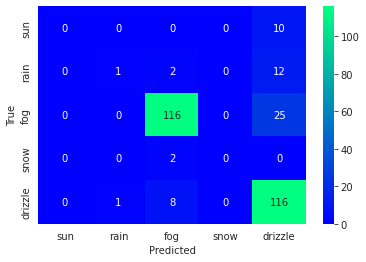

In [139]:
cm = confusion_matrix(y_test, y_pred2)

conf_mat = plot(y_test, y_pred2)
conf_mat.set(xlabel='Predicted', ylabel='True')

**Comapring both graphs.**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Accuracy (between 0 to 1)')

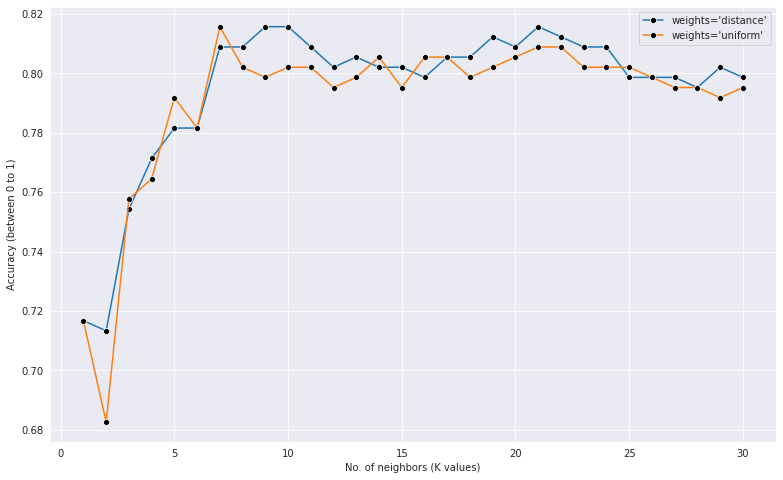

In [138]:
plt.figure(figsize=(13,8))
sb.lineplot(model1[:,0], model1[:, 1], 
            marker='o', markerfacecolor='black')
sb.lineplot(model2[:,0], model2[:, 1], 
            marker='o', markerfacecolor='black')
sb.set_style('darkgrid')
plt.legend(labels = ["weights='distance'", "weights='uniform'"])
plt.xlabel('No. of neighbors (K values)')
plt.ylabel('Accuracy (between 0 to 1)')

Potting confusion matrix.